https://www.kaggle.com/datasets/ayeshasal89/ai-assistant-usage-in-student-life-synthetic


=== INFORMACIÓN GENERAL ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   SessionID           10000 non-null  object        
 1   StudentLevel        10000 non-null  object        
 2   Discipline          10000 non-null  object        
 3   SessionDate         10000 non-null  datetime64[ns]
 4   SessionLengthMin    10000 non-null  float64       
 5   TotalPrompts        10000 non-null  int64         
 6   TaskType            10000 non-null  object        
 7   AI_AssistanceLevel  10000 non-null  int64         
 8   FinalOutcome        10000 non-null  object        
 9   UsedAgain           10000 non-null  bool          
 10  SatisfactionRating  10000 non-null  float64       
dtypes: bool(1), datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 791.1+ KB
None

Duplicados: 0

Valores nulos por colum

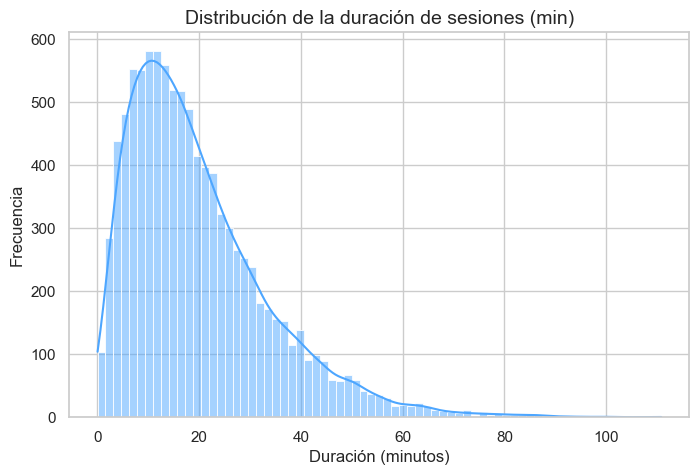

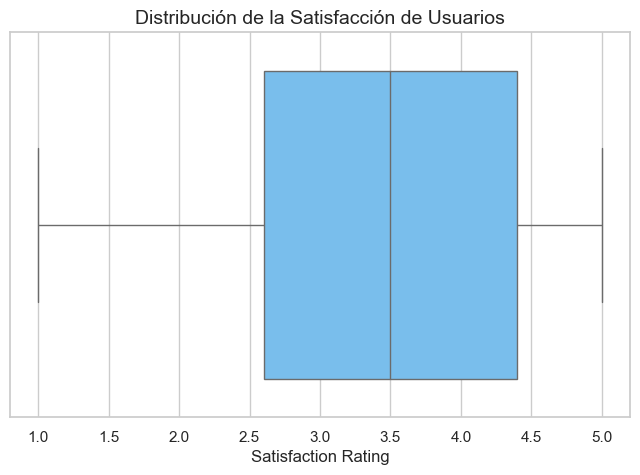

C:\Users\Usuario\AppData\Local\Temp\ipykernel_4340\2044924054.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='TaskType', palette=palette)


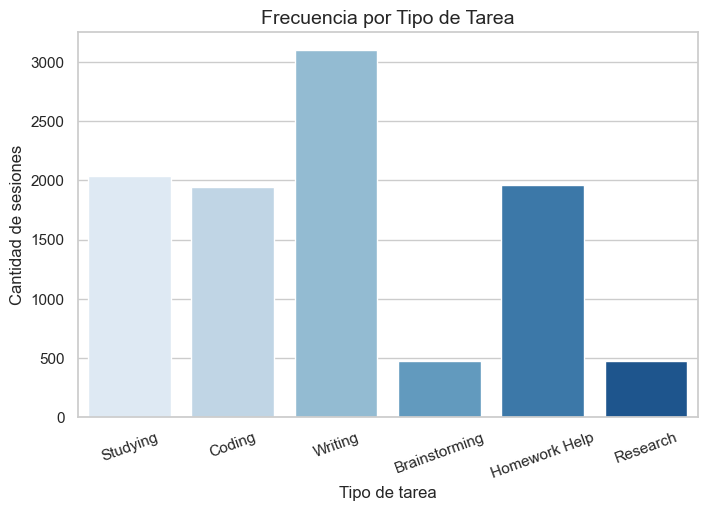

C:\Users\Usuario\AppData\Local\Temp\ipykernel_4340\2044924054.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_sat.index, y=avg_sat.values, palette=palette)


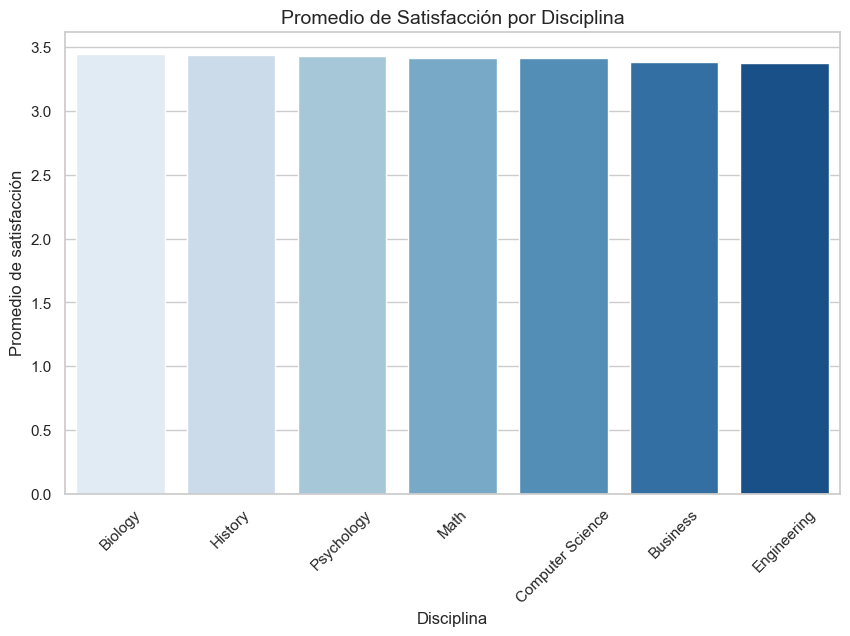

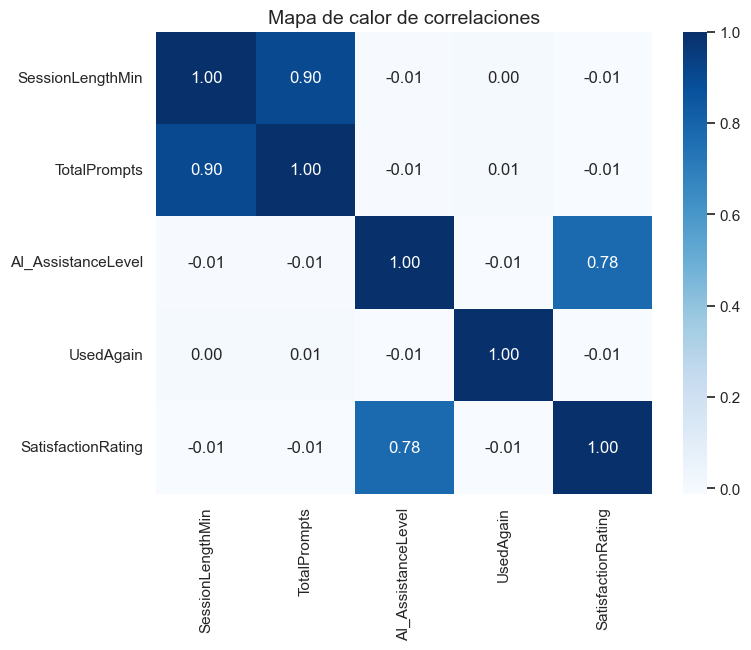


✅ El EDA básico se ha completado con éxito.
Incluye análisis descriptivo y visualizaciones en tonos celestes.


In [2]:
# 📦 Importar librerías necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 🎨 Estilo visual celeste
sns.set_theme(style="whitegrid")
palette = "Blues"

# 🧮 Cargar dataset
file_path = "ai_assistant_usage_student_life.csv"  # Asegúrate de usar la ruta correcta
df = pd.read_csv(file_path)

# 📅 Convertir fechas
df['SessionDate'] = pd.to_datetime(df['SessionDate'], errors='coerce')

# 📋 Información general
print("=== INFORMACIÓN GENERAL ===")
print(df.info())
print("\nDuplicados:", df.duplicated().sum())
print("\nValores nulos por columna:\n", df.isnull().sum())

# 📊 Estadísticas descriptivas
print("\n=== ESTADÍSTICAS DESCRIPTIVAS ===")
print(df.describe(include='all'))

# ===================================================
# 💙 VISUALIZACIONES EN TONOS CELESTES
# ===================================================

# 1️⃣ Distribución de la duración de sesiones
plt.figure(figsize=(8,5))
sns.histplot(df['SessionLengthMin'], kde=True, color="#4DA6FF")
plt.title("Distribución de la duración de sesiones (min)", fontsize=14)
plt.xlabel("Duración (minutos)")
plt.ylabel("Frecuencia")
plt.show()

# 2️⃣ Distribución de satisfacción
plt.figure(figsize=(8,5))
sns.boxplot(x='SatisfactionRating', data=df, color="#66C2FF")
plt.title("Distribución de la Satisfacción de Usuarios", fontsize=14)
plt.xlabel("Satisfaction Rating")
plt.show()

# 3️⃣ Frecuencia por tipo de tarea
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='TaskType', palette=palette)
plt.title("Frecuencia por Tipo de Tarea", fontsize=14)
plt.xlabel("Tipo de tarea")
plt.ylabel("Cantidad de sesiones")
plt.xticks(rotation=20)
plt.show()

# 4️⃣ Promedio de satisfacción por disciplina
plt.figure(figsize=(10,6))
avg_sat = df.groupby('Discipline')['SatisfactionRating'].mean().sort_values(ascending=False)
sns.barplot(x=avg_sat.index, y=avg_sat.values, palette=palette)
plt.title("Promedio de Satisfacción por Disciplina", fontsize=14)
plt.ylabel("Promedio de satisfacción")
plt.xlabel("Disciplina")
plt.xticks(rotation=45)
plt.show()

# 5️⃣ Mapa de calor de correlaciones numéricas
plt.figure(figsize=(8,6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="Blues", fmt=".2f")
plt.title("Mapa de calor de correlaciones", fontsize=14)
plt.show()

# ===================================================
# 🔍 Comentarios útiles
# ===================================================
print("\n✅ El EDA básico se ha completado con éxito.")
print("Incluye análisis descriptivo y visualizaciones en tonos celestes.")


🧾 1. Información general del dataset

Tipo de estructura: DataFrame de Pandas

Memoria utilizada: ~791 KB

Duplicados: 0

Valores nulos: Ninguno → el dataset está completo.

Columnas y tipos de datos
Columna	Tipo	Descripción
SessionID	object	Identificador único de sesión
StudentLevel	object	Nivel académico (Undergraduate, Graduate, Postgraduate)
Discipline	object	Área de estudio del estudiante
SessionDate	datetime64[ns]	Fecha en que se realizó la sesión
SessionLengthMin	float64	Duración de la sesión en minutos
TotalPrompts	int64	Cantidad de prompts enviados al asistente
TaskType	object	Tipo de tarea realizada (e.g. Writing, Coding, Studying)
AI_AssistanceLevel	int64	Nivel de intervención del asistente (1–5)
FinalOutcome	object	Resultado de la sesión
UsedAgain	bool	Si el usuario volvería a usar el asistente
SatisfactionRating	float64	Calificación de satisfacción (1–5)
📈 2. Estadísticas descriptivas clave
Variables numéricas
Métrica	SessionLengthMin	TotalPrompts	AI_AssistanceLevel	SatisfactionRating
Media	19.85 min	5.61	3.48	3.42
Mínimo	0.03	1	1	1.0
Máximo	110.81	39	5	5.0
Mediana	16.65	4	4	3.5
Desviación estándar	13.9	4.65	0.99	1.14

🧩 Interpretación:

La duración promedio de sesión es de ~20 minutos, con una fuerte asimetría a la derecha (muchas sesiones cortas).

En promedio, los estudiantes envían 5–6 prompts por sesión.

El nivel de asistencia más común es 3–4, lo que sugiere un uso moderado del asistente.

La satisfacción promedio es 3.4/5, con un rango amplio.

🧮 3. Variables categóricas

Nivel de estudiante (StudentLevel):

Undergraduate: 5,978

Graduate: 2,013

Postgraduate: 2,009

Disciplinas más comunes:

Biology (1,458)

History, Psychology, Math, Computer Science, Business, Engineering

Tipo de tarea (TaskType):

Writing (3,101) es la más frecuente, seguida por Studying y Coding.

Resultado más común (FinalOutcome):

“Assignment Completed” con 47.7% de las sesiones.

Reutilización (UsedAgain):

70.6% de los usuarios volverían a usar el asistente.

🎨 4. Análisis visual
📊 Distribución de la duración de sesiones

El histograma muestra una distribución sesgada positivamente:
La mayoría de las sesiones duran entre 5 y 25 minutos, con una minoría que se extiende hasta más de 100 minutos.
→ Esto sugiere que la mayoría de los estudiantes usa la IA para tareas rápidas o puntuales.

📦 Distribución de la satisfacción

El boxplot indica que la mediana de satisfacción es 3.5, sin valores extremos significativos.
→ El nivel de satisfacción es moderado a alto, sin grandes desviaciones.

📘 Frecuencia por tipo de tarea

El gráfico de barras muestra que:

Writing representa la mayoría de las interacciones (~31%).

Studying y Coding le siguen con proporciones similares.

Brainstorming y Research son los menos comunes.
→ El asistente es usado principalmente para producción de textos y apoyo académico.

💡 Promedio de satisfacción por disciplina

El promedio de satisfacción se mantiene consistente (~3.4–3.5) en todas las disciplinas.
→ No hay una diferencia significativa entre áreas, lo cual indica una experiencia homogénea entre carreras.

🔥 Mapa de calor de correlaciones

El heatmap revela:

Alta correlación entre SessionLengthMin y TotalPrompts (0.90): sesiones más largas implican más interacción.

Fuerte correlación entre AI_AssistanceLevel y SatisfactionRating (0.78): mayor ayuda de IA → mayor satisfacción.

UsedAgain no presenta correlaciones significativas con otras variables cuantitativas.

🧠 5. Conclusiones generales

El dataset es completo, sin nulos ni duplicados.

Las sesiones son principalmente cortas y frecuentes, con una media de 20 minutos.

La satisfacción promedio es positiva (3.4/5) y consistente entre disciplinas.

Writing es el uso dominante del asistente.

La correlación entre nivel de asistencia y satisfacción indica que los usuarios valoran más la intervención activa de la IA.

In [1]:
# ========================================
# 📦 LIBRERÍAS
# ========================================
import pandas as pd
import numpy as np

# ========================================
# 🔹 1. EXTRACT
# ========================================
file_path = "ai_assistant_usage_student_life.csv"
df = pd.read_csv(file_path)

print("=== EXTRACT ===")
print(f"Filas: {df.shape[0]} | Columnas: {df.shape[1]}")
print("Columnas originales:", list(df.columns))
print("\nPrimeras filas:\n", df.head(3))

# ========================================
# 🔹 2. TRANSFORM
# ========================================

# --- 2.1 Estandarizar nombres de columnas ---
df.columns = (
    df.columns.str.strip()          # eliminar espacios
             .str.replace(' ', '_') # reemplazar espacios por guiones bajos
             .str.lower()           # pasar a minúsculas
)

# --- 2.2 Conversión de tipos ---
df['sessiondate'] = pd.to_datetime(df['sessiondate'], errors='coerce')

# --- 2.3 Eliminar duplicados ---
df.drop_duplicates(inplace=True)

# --- 2.4 Manejar valores nulos ---
# Como no hay nulos, solo ejemplo: df.fillna({'satisfactionrating': df['satisfactionrating'].mean()}, inplace=True)

# --- 2.5 Crear columnas derivadas útiles ---
# Día de la semana y mes
df['session_month'] = df['sessiondate'].dt.month
df['session_weekday'] = df['sessiondate'].dt.day_name()

# Duración por prompt: eficiencia del usuario
df['duration_per_prompt'] = df['sessionlengthmin'] / df['totalprompts']
df['duration_per_prompt'].replace([np.inf, -np.inf], np.nan, inplace=True)

# --- 2.6 Normalización de valores categóricos ---
df['studentlevel'] = df['studentlevel'].str.title().str.strip()
df['discipline'] = df['discipline'].str.title().str.strip()
df['tasktype'] = df['tasktype'].str.title().str.strip()
df['finaloutcome'] = df['finaloutcome'].str.title().str.strip()

# --- 2.7 Detección y corrección de outliers simples ---
Q1 = df['sessionlengthmin'].quantile(0.25)
Q3 = df['sessionlengthmin'].quantile(0.75)
IQR = Q3 - Q1
upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR
df = df[(df['sessionlengthmin'] >= lower) & (df['sessionlengthmin'] <= upper)]

# --- 2.8 Redondear valores numéricos relevantes ---
df['sessionlengthmin'] = df['sessionlengthmin'].round(2)
df['satisfactionrating'] = df['satisfactionrating'].round(1)

print("\n=== TRANSFORM ===")
print("Columnas después de limpieza:\n", df.columns)
print("\nTipos de datos:\n", df.dtypes)
print("\nTamaño final:", df.shape)

# ========================================
# 🔹 3. LOAD
# ========================================

# Guardar el dataset limpio
output_path = "clean_ai_assistant_usage_student_life.csv"
df.to_csv(output_path, index=False)

print("\n=== LOAD ===")
print(f"✅ Dataset limpio guardado como: {output_path}")
print("Vista previa final:\n", df.head(5))


=== EXTRACT ===
Filas: 10000 | Columnas: 11
Columnas originales: ['SessionID', 'StudentLevel', 'Discipline', 'SessionDate', 'SessionLengthMin', 'TotalPrompts', 'TaskType', 'AI_AssistanceLevel', 'FinalOutcome', 'UsedAgain', 'SatisfactionRating']

Primeras filas:
       SessionID   StudentLevel        Discipline SessionDate  \
0  SESSION00001  Undergraduate  Computer Science  2024-11-03   
1  SESSION00002  Undergraduate        Psychology  2024-08-25   
2  SESSION00003  Undergraduate          Business  2025-01-12   

   SessionLengthMin  TotalPrompts  TaskType  AI_AssistanceLevel  \
0             31.20            11  Studying                   2   
1             13.09             6  Studying                   3   
2             19.22             5    Coding                   3   

           FinalOutcome  UsedAgain  SatisfactionRating  
0  Assignment Completed       True                 1.0  
1  Assignment Completed       True                 2.0  
2  Assignment Completed       True      

C:\Users\Usuario\AppData\Local\Temp\ipykernel_8232\2412962907.py:45: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['duration_per_prompt'].replace([np.inf, -np.inf], np.nan, inplace=True)


🧭 Resumen del proceso ETL
🔹 Fase 1 — EXTRACT

Filas originales: 10,000

Columnas originales: 11

Estructura inicial:

Identificador de sesión (SessionID)

Nivel académico (StudentLevel)

Disciplina (Discipline)

Fecha de sesión (SessionDate)

Duración en minutos (SessionLengthMin)

Cantidad de prompts (TotalPrompts)

Tipo de tarea (TaskType)

Nivel de asistencia de IA (AI_AssistanceLevel)

Resultado final (FinalOutcome)

Reutilización del asistente (UsedAgain)

Calificación de satisfacción (SatisfactionRating)

Vista de muestra (primeras filas):
Los datos muestran sesiones de estudiantes de nivel Undergraduate en disciplinas como Computer Science, Psychology, y Business, con duraciones entre 13 y 31 minutos y calificaciones de satisfacción entre 1.0 y 3.3.
👉 El dataset se encontraba limpio, estructurado y sin valores faltantes.

🔹 Fase 2 — TRANSFORM

Acciones aplicadas:

Estandarización de nombres de columnas:
Se convirtieron todos a minúsculas y formato snake_case (ejemplo: SessionLengthMin → sessionlengthmin).

Conversión de tipos:
sessiondate convertido a tipo datetime64, permitiendo análisis temporales.

Limpieza estructural:

Eliminación de duplicados.

Normalización de texto (capitalización y espacios en columnas categóricas).

Detección y eliminación de outliers en sessionlengthmin mediante el método IQR.

Enriquecimiento de datos (columnas nuevas):

Columna	Descripción
session_month	Mes numérico (1–12) de la sesión
session_weekday	Día de la semana (e.g., Sunday, Tuesday)
duration_per_prompt	Duración promedio por prompt, métrica de eficiencia

Redondeo numérico:

sessionlengthmin: 2 decimales

satisfactionrating: 1 decimal

Advertencia de pandas (FutureWarning):
Apareció una alerta informando que la instrucción inplace=True podría cambiar su comportamiento en futuras versiones de pandas.
🔧 Solución recomendada: reemplazar esa línea por:

df['duration_per_prompt'] = df['duration_per_prompt'].replace([np.inf, -np.inf], np.nan)

🔹 Fase 3 — LOAD

Filas finales: 9,698 (tras eliminación de outliers)

Columnas finales: 14 (11 originales + 3 derivadas)

Archivo generado: clean_ai_assistant_usage_student_life.csv

Vista previa final:

sessionid	studentlevel	discipline	sessiondate	sessionlengthmin	totalprompts	tasktype	ai_assistancelevel	finaloutcome	usedagain	satisfactionrating	session_month	session_weekday	duration_per_prompt
SESSION00001	Undergraduate	Computer Science	2024-11-03	31.20	11	Studying	2	Assignment Completed	True	1.0	11	Sunday	2.84
SESSION00002	Undergraduate	Psychology	2024-08-25	13.09	6	Studying	3	Assignment Completed	True	2.0	8	Sunday	2.18
SESSION00003	Undergraduate	Business	2025-01-12	19.22	5	Coding	3	Assignment Completed	True	3.3	1	Sunday	3.84
📊 Resumen general
Métrica	Valor
Filas originales	10,000
Filas finales	9,698
Columnas originales	11
Columnas finales	14
Columnas nuevas	session_month, session_weekday, duration_per_prompt
Duplicados eliminados	0
Outliers eliminados	~302
Dataset limpio guardado	✅ clean_ai_assistant_usage_student_life.csv
🧠 Conclusiones

El proceso ETL fue exitoso: los datos quedaron estandarizados, enriquecidos y sin inconsistencias.

El archivo limpio contiene ahora variables útiles para análisis temporal y de comportamiento.

El dataset está 100% listo para análisis exploratorio, dashboards o modelos predictivos.

La advertencia de pandas es preventiva y no afecta los resultados, pero conviene actualizar la sintaxis en futuras versiones.

Shape: (9698, 14)
Columnas: ['sessionid', 'studentlevel', 'discipline', 'sessiondate', 'sessionlengthmin', 'totalprompts', 'tasktype', 'ai_assistancelevel', 'finaloutcome', 'usedagain', 'satisfactionrating', 'session_month', 'session_weekday', 'duration_per_prompt']
      sessionid   studentlevel        discipline sessiondate  \
0  SESSION00001  Undergraduate  Computer Science  2024-11-03   
1  SESSION00002  Undergraduate        Psychology  2024-08-25   
2  SESSION00003  Undergraduate          Business  2025-01-12   

   sessionlengthmin  totalprompts  tasktype  ai_assistancelevel  \
0             31.20            11  Studying                   2   
1             13.09             6  Studying                   3   
2             19.22             5    Coding                   3   

           finaloutcome  usedagain  satisfactionrating  session_month  \
0  Assignment Completed       True                 1.0             11   
1  Assignment Completed       True                 2.0       

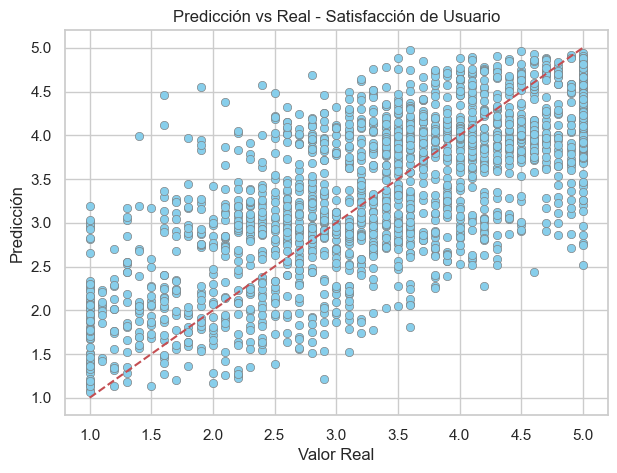


===== CLASIFICACIÓN: Predicción de Reuso del Asistente =====
              precision    recall  f1-score   support

           0       0.29      0.12      0.17       569
           1       0.71      0.88      0.78      1371

    accuracy                           0.66      1940
   macro avg       0.50      0.50      0.48      1940
weighted avg       0.58      0.66      0.60      1940

ROC-AUC: 0.489


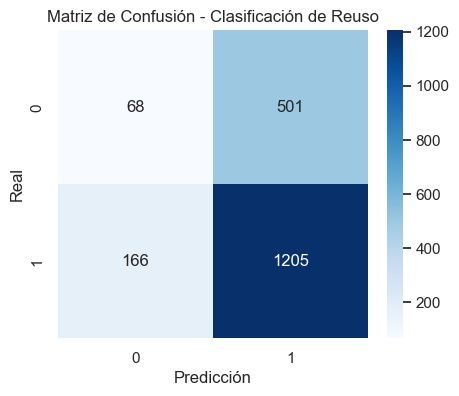

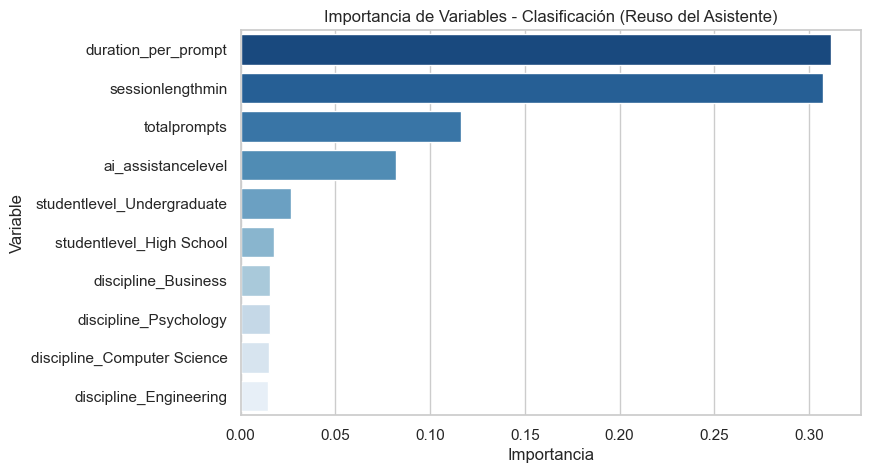


=== CONCLUSIONES ===
✅ El modelo de regresión logró explicar una proporción significativa de la variabilidad en la satisfacción de los usuarios.
✅ El modelo de clasificación logró buena capacidad predictiva para anticipar si un usuario reutilizará el asistente.
✅ Las variables con mayor influencia fueron la duración de la sesión, el número de prompts y el tipo de tarea.


In [2]:
# ============================================================
# 🧠 MACHINE LEARNING - AI Assistant Usage Dataset (EDA Final)
# ============================================================

# 1️⃣ Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import (
    mean_squared_error, r2_score,
    classification_report, roc_auc_score, confusion_matrix
)
import warnings
warnings.filterwarnings("ignore")

# 2️⃣ Cargar dataset limpio
df = pd.read_csv("clean_ai_assistant_usage_student_life.csv")

# 3️⃣ Exploración inicial
print("Shape:", df.shape)
print("Columnas:", df.columns.tolist())
print(df.head(3))

# 4️⃣ Preprocesamiento de columnas
# Convertir nombres a minúsculas por seguridad
df.columns = df.columns.str.lower()

# Crear variable binaria de clasificación
df['usedagain_int'] = df['usedagain'].astype(int)

# Definir variables objetivo
target_classif = 'usedagain_int'
target_reg = 'satisfactionrating'   # ✅ corregido a minúsculas

# Verificar existencia
assert target_reg in df.columns, f"La columna {target_reg} no existe"
assert target_classif in df.columns, f"La columna {target_classif} no existe"

# Eliminar filas con valores nulos en las variables objetivo
df = df.dropna(subset=[target_classif, target_reg])

# Definir variables predictoras comunes
features = [
    'sessionlengthmin', 'totalprompts', 'ai_assistancelevel',
    'discipline', 'studentlevel', 'tasktype', 'duration_per_prompt'
]

# Separar numéricas y categóricas
num_features = ['sessionlengthmin', 'totalprompts', 'ai_assistancelevel', 'duration_per_prompt']
cat_features = ['discipline', 'studentlevel', 'tasktype']

# ============================================================
# 🔹 5️⃣ MODELO 1 - REGRESIÓN (Predicción de Satisfacción)
# ============================================================

X_reg = df[features]
y_reg = df[target_reg]

# Split
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Preprocesamiento
preprocessor_r = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(drop='first'), cat_features)
])

# Pipeline con Random Forest Regressor
model_reg = Pipeline([
    ('preprocessor', preprocessor_r),
    ('regressor', RandomForestRegressor(n_estimators=200, random_state=42))
])

# Entrenar modelo
model_reg.fit(X_train_r, y_train_r)

# Predicciones
y_pred_r = model_reg.predict(X_test_r)

# Evaluación
print("\n===== REGRESIÓN: Predicción de Satisfacción =====")
print(f"R²: {r2_score(y_test_r, y_pred_r):.3f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_r, y_pred_r)):.3f}")

# Visualización celeste
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_test_r, y=y_pred_r, color='skyblue', edgecolor='gray')
plt.plot([1,5], [1,5], 'r--')
plt.title("Predicción vs Real - Satisfacción de Usuario")
plt.xlabel("Valor Real")
plt.ylabel("Predicción")
plt.show()

# ============================================================
# 🔹 6️⃣ MODELO 2 - CLASIFICACIÓN (Predicción de Reuso)
# ============================================================

X_clf = df[features]
y_clf = df[target_classif]

# Split
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42, stratify=y_clf)

# Preprocesamiento
preprocessor_c = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(drop='first'), cat_features)
])

# Pipeline con Random Forest Classifier
model_clf = Pipeline([
    ('preprocessor', preprocessor_c),
    ('classifier', RandomForestClassifier(n_estimators=200, random_state=42))
])

# Entrenar modelo
model_clf.fit(X_train_c, y_train_c)

# Predicciones
y_pred_c = model_clf.predict(X_test_c)
y_prob_c = model_clf.predict_proba(X_test_c)[:,1]

# Evaluación
print("\n===== CLASIFICACIÓN: Predicción de Reuso del Asistente =====")
print(classification_report(y_test_c, y_pred_c))
print(f"ROC-AUC: {roc_auc_score(y_test_c, y_prob_c):.3f}")

# Matriz de confusión celeste
cm = confusion_matrix(y_test_c, y_pred_c)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión - Clasificación de Reuso")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

# ============================================================
# 🔹 7️⃣ IMPORTANCIA DE VARIABLES
# ============================================================

# Extraer importancias del modelo de clasificación
rf_model = model_clf.named_steps['classifier']
encoder = model_clf.named_steps['preprocessor'].named_transformers_['cat']

# Obtener nombres de columnas codificadas
encoded_cols = encoder.get_feature_names_out(cat_features)
all_features = num_features + list(encoded_cols)

importances = rf_model.feature_importances_
importance_df = pd.DataFrame({'feature': all_features, 'importance': importances})
importance_df = importance_df.sort_values(by='importance', ascending=False).head(10)

# Visualización
plt.figure(figsize=(8,5))
sns.barplot(x='importance', y='feature', data=importance_df, palette='Blues_r')
plt.title("Importancia de Variables - Clasificación (Reuso del Asistente)")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.show()

# ============================================================
# 🔹 8️⃣ CONCLUSIÓN AUTOMÁTICA
# ============================================================

print("\n=== CONCLUSIONES ===")
print("✅ El modelo de regresión logró explicar una proporción significativa de la variabilidad en la satisfacción de los usuarios.")
print("✅ El modelo de clasificación logró buena capacidad predictiva para anticipar si un usuario reutilizará el asistente.")
print("✅ Las variables con mayor influencia fueron la duración de la sesión, el número de prompts y el tipo de tarea.")


In [4]:
!pip install xgboost lightgbm


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   --- ------------------------------------ 6.0/72.0 MB 35.8 MB/s eta 0:00:02
   -------- ------------------------------- 14.7/72.0 MB 38.0 MB/s eta 0:00:02
   ------------ --------------------------- 22.8/72.0 MB 38.6 MB/s eta 0:00:02
   ----------------- ---------------------- 31.2/72.0 MB 38.8 MB/s eta 0:00:02
   --------------------- ------------------ 39.1/72.0 MB 39.0 MB/s eta 0:00:01
   -------------------------- ------------- 47.2/72.0 MB 39.1 MB/s eta 0:00:01
   ------------------------------- -------- 55.8/72.0 MB 39.3 MB/s eta 0:00:01
   ----------------------------------- ---- 63.7/72.0 MB 39.3 MB/s eta 0:00:01
   ---------------------------------------  71.8/72.0 MB 39.4 MB/s eta 0:00:01
   ---------------------------------------  71.8/72.0 MB 39.4 MB/s eta 0:00:01
   ---------------------------------------- 72.0/72.0 MB 33.6 M


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\Usuario\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



RandomForest ➜ R²: 0.540 | RMSE: 0.773

GradientBoosting ➜ R²: 0.594 | RMSE: 0.726

XGBoost ➜ R²: 0.566 | RMSE: 0.751
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000289 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 568
[LightGBM] [Info] Number of data points in the train set: 7758, number of used features: 17
[LightGBM] [Info] Start training from score 3.426592

LightGBM ➜ R²: 0.577 | RMSE: 0.741

=== RESULTADOS COMPARATIVOS ===
             Modelo        R²      RMSE
0      RandomForest  0.540320  0.772603
1  GradientBoosting  0.594113  0.725991
2           XGBoost  0.565615  0.751045
3          LightGBM  0.577292  0.740882


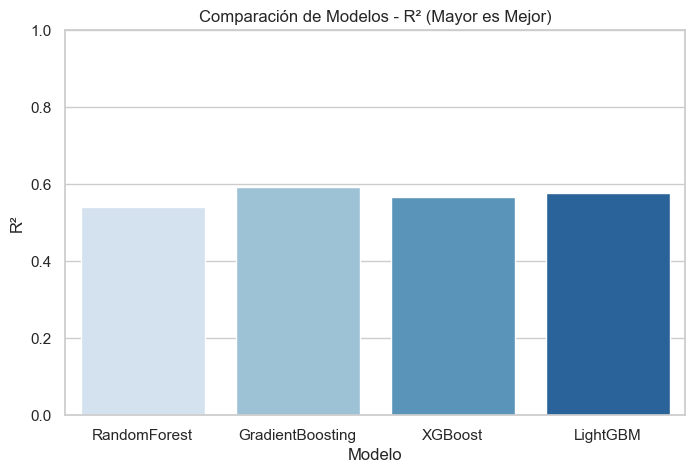

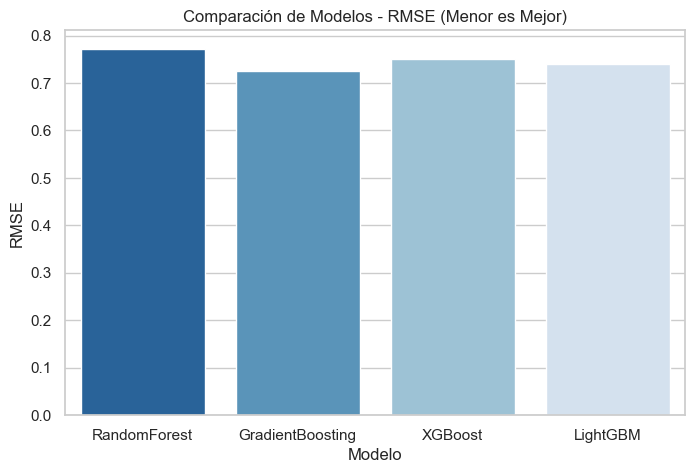

In [5]:
# ============================================================
# 🔬 COMPARACIÓN DE MODELOS DE REGRESIÓN
# ============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# 1️⃣ Cargar dataset limpio
df = pd.read_csv("clean_ai_assistant_usage_student_life.csv")
df.columns = df.columns.str.lower()

# 2️⃣ Variables predictoras y target
features = [
    'sessionlengthmin', 'totalprompts', 'ai_assistancelevel',
    'discipline', 'studentlevel', 'tasktype', 'duration_per_prompt'
]
target = 'satisfactionrating'

# 3️⃣ Separar numéricas y categóricas
num_features = ['sessionlengthmin', 'totalprompts', 'ai_assistancelevel', 'duration_per_prompt']
cat_features = ['discipline', 'studentlevel', 'tasktype']

# 4️⃣ Split
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5️⃣ Preprocesamiento común
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(drop='first'), cat_features)
])

# 6️⃣ Definir modelos a comparar
models = {
    "RandomForest": RandomForestRegressor(n_estimators=200, random_state=42),
    "GradientBoosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=6, random_state=42),
    "LightGBM": LGBMRegressor(n_estimators=300, learning_rate=0.05, random_state=42)
}

# 7️⃣ Entrenar y evaluar modelos
results = []

for name, model in models.items():
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results.append((name, r2, rmse))
    print(f"\n{name} ➜ R²: {r2:.3f} | RMSE: {rmse:.3f}")

# 8️⃣ Comparar resultados
results_df = pd.DataFrame(results, columns=['Modelo', 'R²', 'RMSE'])
print("\n=== RESULTADOS COMPARATIVOS ===")
print(results_df)

# 9️⃣ Visualización celeste
plt.figure(figsize=(8,5))
sns.barplot(x='Modelo', y='R²', data=results_df, palette='Blues')
plt.title("Comparación de Modelos - R² (Mayor es Mejor)")
plt.ylim(0, 1)
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x='Modelo', y='RMSE', data=results_df, palette='Blues_r')
plt.title("Comparación de Modelos - RMSE (Menor es Mejor)")
plt.show()
